# 1. 문제 정의
- 데이터 전처리 및 시각화 방법에 대한 학습

# 2. 데이터 수집

In [1]:
import pandas as pd

# index_col : 인덱스 칼럼을 설정
train = pd.read_csv('data/titanic_train.csv', index_col = 'PassengerId')
test = pd.read_csv('data/titanic_test.csv', index_col = 'PassengerId')

# 3. 탐색적 데이터 분석 및 전처리
- 데이터를 이해하자!
- 결측치, 이상치, 오류가 있는지 확인
    - 결측치 : 컬럼의 값이 없는 데이터
    - 이상치 : 다른 값들과 차이가 큰 값
    - 오류치 >> 이상치 >> 결측치 순으로 데이터 전처리하기!
- 기술 통계
- 상관 관계
- 시각화

### 데이터 전처리 방법
- 통합(Grouping, 범주형 데이터의 클래스가 너무 많을 시, 사용), 
- 인코딩, 
- 정규화, 
- 라벨 인코딩 등을 통해 데이터 전처리

In [2]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


- 분석 feature : Pclass, Age, Name, SibSp, Parch, Fare, Ticket, Cabin, Embarked
- 예측 target label : Survived
- feature

<table style="border:none; align: ceter; width:700px;">
  <tr><th>feature<th style="width:200px;">의미<th style="width:300px;">설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer
  <tr><td>Name<td>이름<td>호칭과 이름으로 구성<td>string
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>string
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>

## 3.1 결측치 확인
- .info(), .describe(), .isnull()과 sum()함수로 결측치 확인

In [3]:
# 훈련 데이터의 결측치
print(train.info())

# Age, Cabin, Embarked에 결측치가 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


In [4]:
# 테스트 데이터의 결측치
print(test.info())

# Age, Fare, Cabin에 결측치가 존재
# 한공간에 의자에 앉아 가는 사람들(입석)은 Cabin 값 없을 수 있음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


# 결측치 채우는 방법
- 수치형 데이터
    - 기술 통계(평균 or 중간값)
    - 결측치가 적은 경우 : 전체 평균이나 중간값을 대입
    - 결측치가 많은 경우(20~30%) : 결측치가 있는 데이터의 다른 컬럼과 같은 값을 갖는(동일한 특성을 갖는) 데이터의 결측치 통계(평균, or 중간값)를 사용 (피벗 테이블을 이용할 것임)
    -
- 범주형 데이터
    - 결측치가 적은 경우 : 데이터 수가 가장 많은 클래스로 할당 >> 기존 데이터가 결측치가 있는 데이터에 의해 영향을 덜 받기 때문에)
    - 결측치가 많은 경우 : 데이터 수가 가장 많은 클래스로 할당 >> 편향이 됨 >> 기존 데이터의 개수 비율만큼 랜덤으로 할당

In [5]:
# 결측치 개수 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [7]:
print(train.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [8]:
print(test.describe())

           Pclass         Age       SibSp       Parch        Fare
count  418.000000  332.000000  418.000000  418.000000  417.000000
mean     2.265550   30.272590    0.447368    0.392344   35.627188
std      0.841838   14.181209    0.896760    0.981429   55.907576
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      1.000000   21.000000    0.000000    0.000000    7.895800
50%      3.000000   27.000000    0.000000    0.000000   14.454200
75%      3.000000   39.000000    1.000000    0.000000   31.500000
max      3.000000   76.000000    8.000000    9.000000  512.329200


In [9]:
# 등급결 (Pclass) 통계 (평균)
# groupby() : 원하는 컬럼을 중심으로 그룹핑해주는 함수
# Pclass 컬럼의 클래스별로 각 컬럼의 평균을 계산
train.groupby("Pclass").mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


- 1등실 생존률이 높았다.
- 나이를 보면 3등실에 나이가 적은 승객이 많았다.
- 1등실 일수록 가족 수가 적었다.(3등실 일수록 가족 수가 많았다.)

In [10]:
print(train.groupby(['Pclass', 'Survived']).mean())

                       Age     SibSp     Parch       Fare
Pclass Survived                                          
1      0         43.695312  0.287500  0.300000  64.684007
       1         35.368197  0.492647  0.389706  95.608029
2      0         33.544444  0.319588  0.144330  19.412328
       1         25.901566  0.494253  0.643678  22.055700
3      0         26.555556  0.672043  0.384409  13.669364
       1         20.646118  0.436975  0.420168  13.694887


- 3등실 승객의 사망/ 생존자의 요금은 비슷하다.
- 1등실 승객의 사망/ 생존자의 요금은 생존자의 요금이 더 비쌌다.
- 같은 클래스에서 나이가 어릴수록 생존이 높았다.

## 3.2 Age 결측치 채우기
- 결측치가 있는 데이터의 다른 칼럼의 값과 같은 데이터의 평균값을 사용해서 결측치를 채움
- 그럼 어떤 칼럼을 참조할까요?
    - 결측치가 있는 컬럼(Age)와 상관관계가 높은 컬럼 선택(범주형)
- 피벗 테이블을 활용
- apply()을 이용하여 전체 데이터에 결측치를 채움
    - apply() : 데이터프레임의 데이터를 분리해서 원하는 처리를 수행한 후, 다시 병합하는 함수(=재구조화 함수, Reconstruct function)

In [11]:
# Age 컬럼과 상관관계가 높은 칼럼찾기
print(train.corr())

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


In [12]:
# 피벗 테이블 생성
# 데이터.pivot_table(
#     values = 결측치 채울 칼럼,
#     index = 참고할 칼럼(리스트),
#     aggfunc = 사용할 수학 도구(평균 or 중간값)
# )


pt1 = train.pivot_table(values = 'Age', index = ['Pclass', 'Sex'], aggfunc = 'mean')
print(pt1)

                     Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589


In [13]:
train1 = train.copy()
train1 = pd.concat([train1,pd.get_dummies(train1['Sex'])], axis=1)
del train1['Sex']
train1 = pd.concat([train1,pd.get_dummies(train1['Embarked'])], axis=1)
del train1['Embarked']
train1['female'] = train1['female'].astype('int')
train1['male'] = train1['male'].astype('int')
train1['C'] = train1['C'].astype('int')
train1['Q'] = train1['Q'].astype('int')
train1['S'] = train1['S'].astype('int')
train1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
female,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624


In [14]:
# 피벗 테이블에 접근하는 방법
pt1.loc[1, 'male']

Age    41.281386
Name: (1, male), dtype: float64

In [15]:
import numpy as np

# Age 칼럼의 결측치를 채우는 함수
def fill_age(row) :
    # 한 줄 데이터에서 Age 컬럼이 결측치라면
    if np.isnan(row['Age']) :
        # 피벗 테이블을 참조(같은 Pclass와 Sex인 값을 반환)
        return pt1.loc[row['Pclass'], row['Sex']]
    # 결측치가 아닌 경우
    else :
        return row['Age']

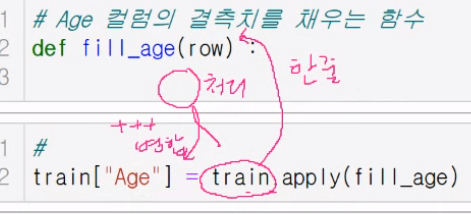
- apply함수는 한 행 단위로 사용자 지정 함수에 넘어가서 처리하고 여러 행을 병합해서 반환

In [16]:
# axis=1 : 한 줄씩 넘긴다.
# astype('int64') : 나이는 실수(소수)가 없으니 정수로 변환
train['Age'] = train.apply(fill_age, axis=1).astype('int64')
test['Age'] = test.apply(fill_age, axis=1).astype('int64')
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non

(None, None)

## 3.4 train 데이터의 Embarked 결측치 채우기

In [17]:
# 결측치가 2개 밖에 없기 때문에 
# 가장 많은 데이터수를 갖는 클래스로 결측치를 할당  >> S
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# Embarked 컬럼이 결측치인 값을 S로 채운다.
train['Embarked'] = train['Embarked'].fillna('S')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [20]:
# 결측치가 있는 데이터를 확인
print(test[test['Fare'].isnull()])

             Pclass                Name   Sex  Age  SibSp  Parch Ticket  Fare  \
PassengerId                                                                     
1044              3  Storey, Mr. Thomas  male   60      0      0   3701   NaN   

            Cabin Embarked  
PassengerId                 
1044          NaN        S  


## 3.5 test 데이터의 Fare 결측치 채우기

In [22]:
pt2 = test.pivot_table(values = 'Fare', index = ['Pclass', 'Embarked'], aggfunc='mean')
print(pt2)

                       Fare
Pclass Embarked            
1      C         110.073511
       Q          90.000000
       S          76.677504
2      C          20.120445
       Q          11.273950
       S          23.056090
3      C          10.658700
       Q           8.998985
       S          13.913030


In [21]:
# apply함수 적용하는 것보다 더 간단한 방법이 있다고 하셔서 써 본 코드
# test['Fare'] = test['Fare'].fillna(test.groupby(['Pclass','Sex']).mean()['Fare'].loc[3,'male'])
# test.info()

In [ ]:
# 결측치가 1개 밖이라 그냥 간단하게 직접 채워도 됨(그게 더 빠름)
#test['Fare'] = test['fare'].fillna(13.913030)

In [26]:
# 또 다른 방법
# 피벗 테이블에 바로 loc를 하면, Series 타입이라 에러가 나는데 , float 타입으로 형변환 하면 결측치가 채워짐
#test['Fare'] = test['Fare'].fillna(float(pt2.loc[3,'S']))

In [23]:
def fill_fare(row) :
    if np.isnan(row['Fare']) :
        return pt2.loc[row['Pclass'], row['Embarked']]
    else :
        return row['Fare']

In [24]:
test['Fare'] = test.apply(fill_fare, axis=1).astype('int64')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    object
 2   Sex       418 non-null    object
 3   Age       418 non-null    int64 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Ticket    418 non-null    object
 7   Fare      418 non-null    int64 
 8   Cabin     91 non-null     object
 9   Embarked  418 non-null    object
dtypes: int64(5), object(5)
memory usage: 35.9+ KB


## 3.6 Cabin 결측치 채우기
- 결측치가 실제 객실이 없는 승객이었을 가능성이 있으므로 원래값에 중복되지 않는 영문자로 채움
- 원래 객실번호의 첫번째 영문자 추출

In [28]:
# 결측치를 M으로 채움
train["Cabin"] = train["Cabin"].fillna('M')
test["Cabin"] = test["Cabin"].fillna('M')

In [29]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    object
 2   Sex       418 non-null    object
 3   Age       418 non-null

(None, None)

In [ ]:
# 범주형 데이터 통합(Grouping) : 범주형 데이터의 클래스가 너무 많을 시, 그룹핑을 통해 범주형 클래스의 수를 줄임

In [30]:
# 원래 객실번호의 첫번째 영문자 추출
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

In [31]:
train['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

## 3.7 데이터 시각화 하기